In [2]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
df= pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True )

In [6]:
x = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9857142857142858


In [7]:
examples_measures = np.array([4,2,1,1,1,2,3,2,1]).reshape(1,-1)

In [8]:
prediction=clf.predict(examples_measures)
print(prediction)

[2]


In [9]:
examples_measures=np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,2,2,2,3,2,1]]).reshape(2, -1) #(len(examples_measures),-1)

In [10]:
prediction=clf.predict(examples_measures)
print(prediction)

[2 2]


### For KNN, k means the distance between the neighbors which works with Eucleadian distance. So we are going to calculate it. 

In [11]:
from math import sqrt

In [12]:
plot1= [1,3]
plot2= [2,5]


In [13]:
euclidean_dist = sqrt((plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2)

In [14]:
print(euclidean_dist)

2.23606797749979


In [15]:
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings
style.use('fivethirtyeight')

In [16]:
dataset ={'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features =[5,7]

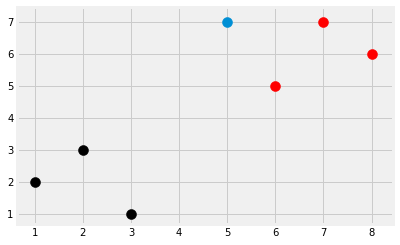

In [17]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1], s=100, color=i)
# or [[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in datset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

In [18]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warning.warn('k is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            #euclidean_dist = sqrt((features[0]-predict[0])**2 + (features[1]-predict[1])**2)
            #euclidean_dist =np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            euclidean_dist = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_dist, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    print (Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result

result = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

[('r', 3)]
r


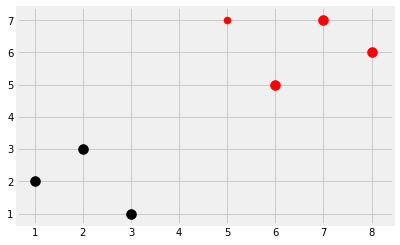

In [19]:
[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], color = result, s=50)

### comparing our algorithm to scikit-learn predefined knn algorithm for the breast cancer data

In [20]:
import random

In [21]:
#to make all dataset(breast_cancer_winscosin) an integer or float
full_data = df.astype(float).values.tolist()

#to shuffle data
random.shuffle(full_data)

In [22]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set= {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [23]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [24]:
correct =0
total=0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group ==vote:
            correct +=1
        total +=1
print('Accuracy:', correct/total)

[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(4, 3)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 3)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(4, 3)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 4)]
[(4, 3)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 4)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 5)]
[(4, 4)]
[

### Working with Support vector machine

In [25]:
clf2 = svm.SVC()
clf2.fit(X_train, y_train)
accuracy=clf2.score(X_test, y_test)
print(accuracy)

0.95


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
prediction=clf2.predict(examples_measures)
print(prediction)

[2 2]


In [28]:
style.use('ggplot')

### Theory of SVM

In [43]:
class SupportVectorMachine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors ={1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax= self.fig.add_subplot(1,1,1)
        
    def fit(self, data):
        self.data = data
        opt_dict ={}
        
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
        
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
             for feature in featureset:
                all_data.append(feature)
                
        self.max_feature_values = max(all_data)
        self.min_features_values = min(all_data)
        all_data= None
        
        step_sizes =[self.max_feature_values*0.1,
                    self.max_feature_values*0.01,
                    self.max_feature_values*0.001]
        
        b_range_multiple =5
    def predict(self, features):
        #sign(x.w+b)
        classification = np.sign(np.dot(np.array(features), self.w)+self.b)
        
        return classification

IndentationError: expected an indented block (<ipython-input-43-4ef023d9c6e5>, line 18)

In [ ]:
data_dict ={-1:np.array([[1,7],[2,8],[3,8]]), 
            1:np.array([5,1],[6,-1],[7,3])}